In [54]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import normal
from scipy.stats import norm
from math import sqrt

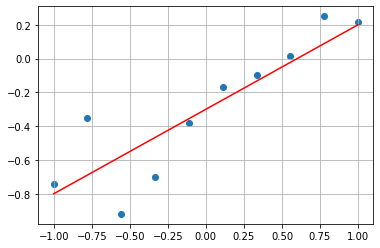

In [55]:
x = np.linspace(-1, 1, 10)

def line(x, w0=-0.3, w1=0.5):
    return w0 + w1*x

y,t = [],[]
for i in x:
    i = line(i)
    t.append(i)
    y.append(i+normal(0,0.2))
plt.scatter(x,y)
plt.grid()
plt.plot(x, t, "red")
plt.show()

In [56]:
def gaussian(x, y, w0, w1):
    dev = 0.2
    const = sqrt(np.pi * 2) * dev
    return const * np.exp(-0.5 * ((y - line(x, w0, w1))/dev) ** 2)

In [57]:
w0, w1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
p0 = norm.pdf(w0, 0, sqrt(0.5))
p1 = norm.pdf(w1, 0, sqrt(0.5))
prior = p0 * p1


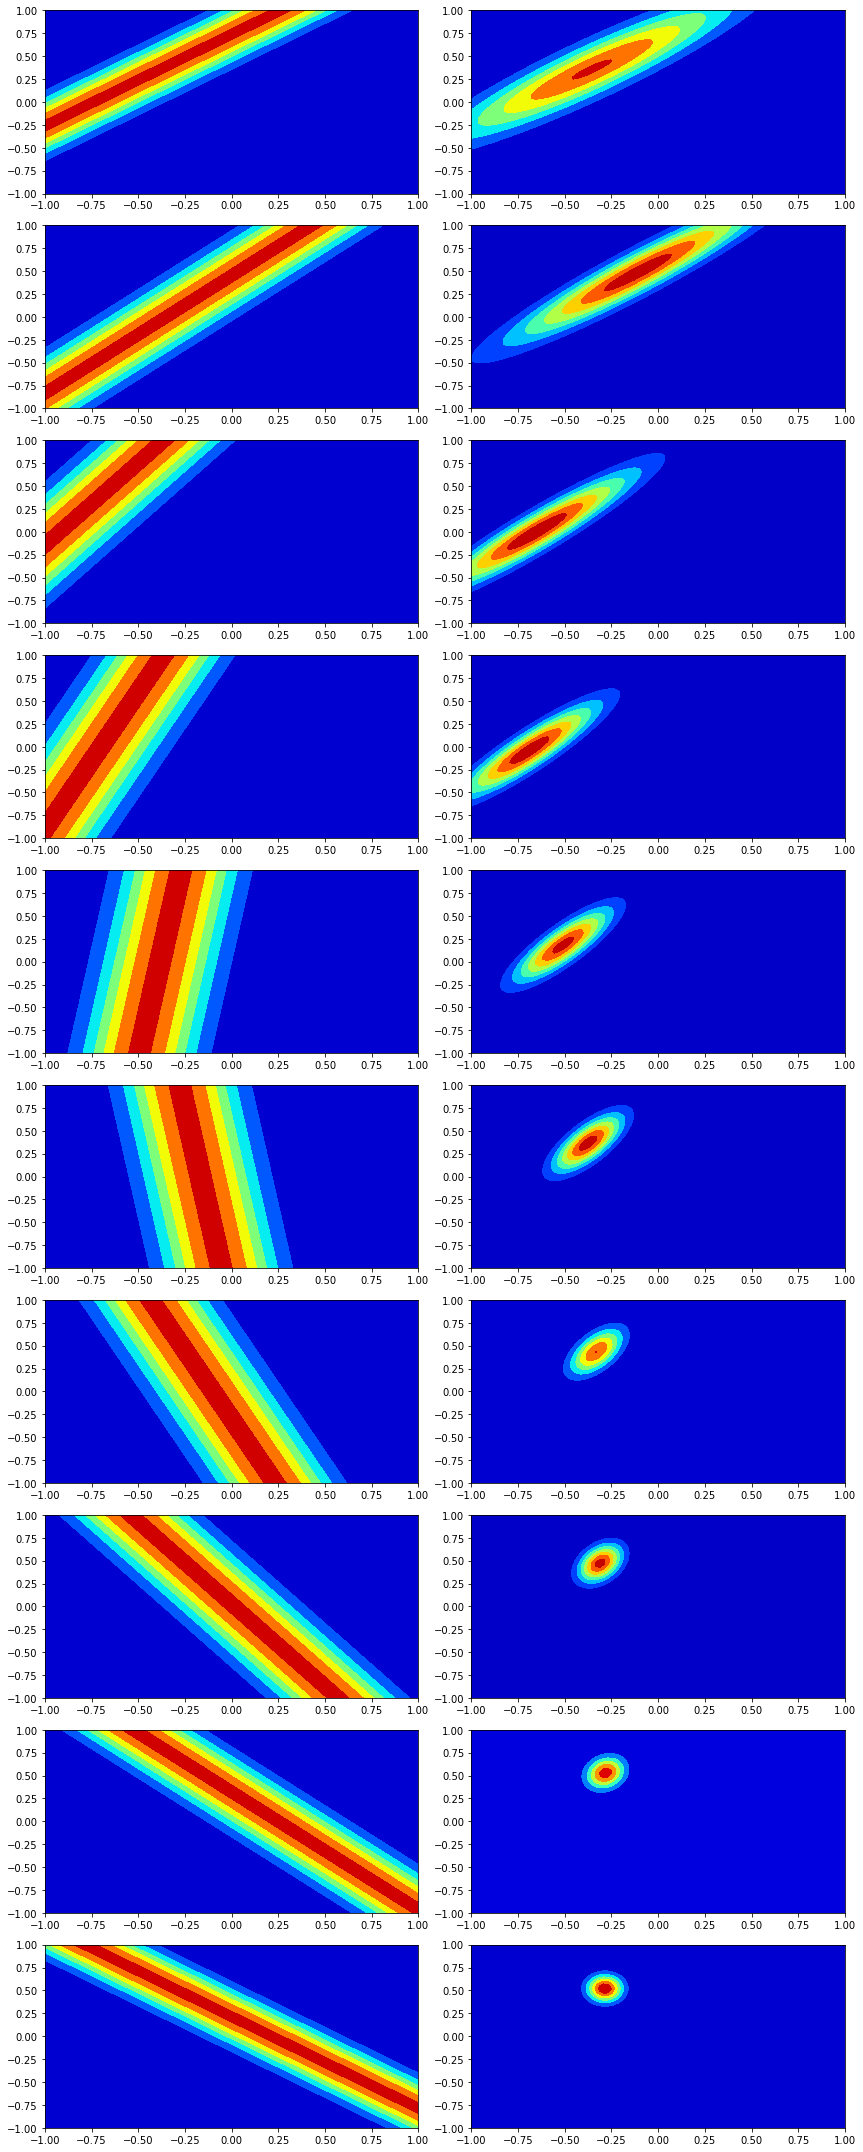

In [58]:
fig, axs = plt.subplots(10, 2, figsize=(12, 30))
count = 0
for i, j in zip(x, y):
    likelihood = gaussian(i, j, w0, w1)
    posterior = prior * likelihood
    prior = posterior
    axs[count, 0].contourf(w0, w1, likelihood, cmap="jet")
    axs[count, 1].contourf(w0, w1, posterior, cmap="jet")
    count += 1
fig.tight_layout()